<a href="https://colab.research.google.com/github/Hemraj-Sukriya/Emotion-Detection-using-CNN/blob/master/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Extract Data set from Zip file
from zipfile import ZipFile
file_name="/content/drive/My Drive/Ip/face data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
# get the data
filname = '/content/fer2013.csv'

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)


,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [ ]:
#take  pixel values and Labels from Data frame
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
#Reshape the Image
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [ ]:
#split the dataset into traing and testing Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
# Importing lib.  for CNN Model 
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:


from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [ ]:
# define the Architecture of our model 
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

In [ ]:

path_model='model_filter.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 34s 1ms/step - loss: 1.6254 - accuracy: 0.3758 - val_loss: 1.5362 - val_accuracy: 0.4263
Epoch 2/20
32298/32298 [==============================] - 29s 893us/step - loss: 1.2657 - accuracy: 0.5159 - val_loss: 1.2443 - val_accuracy: 0.5132
Epoch 3/20
32298/32298 [==============================] - 29s 893us/step - loss: 1.0961 - accuracy: 0.5881 - val_loss: 1.5026 - val_accuracy: 0.4798
Epoch 4/20
32298/32298 [==============================] - 29s 893us/step - loss: 0.9823 - accuracy: 0.6342 - val_loss: 1.1896 - val_accuracy: 0.5458
Epoch 5/20
32298/32298 [==============================] - 29s 892us/step - loss: 0.8616 - accuracy: 0.6842 - val_loss: 1.1408 - val_accuracy: 0.5846
Epoch 6/20
32298/32298 [==============================] - 29s 891us/step - loss: 0.7338 - accuracy: 0.7325 - val_loss: 1.1269 - val_accuracy: 0.6096
Epoch 7/20
32298/32298 [==============================] - 2

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
import matplotlib.pyplot as plt
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

In [ ]:
def Emotion(path):
   from skimage import io
   img = image.load_img(path, grayscale=True, target_size=(48, 48))
   show_img=image.load_img(path, grayscale=False, target_size=(200, 200))
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis = 0)

   x /= 255

   custom = model.predict(x)
   #print(custom[0])
   emotion_analysis(custom[0])

   x = np.array(x, 'float32')
   x = x.reshape([48, 48]);

   plt.gray()
   plt.imshow(show_img)
   plt.show()

   m=0.000000000000000000001
   a=custom[0]
   for i in range(0,len(a)):
       if a[i]>m:
         m=a[i]
         ind=i
         return(print('Expression Prediction:',objects[ind]))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


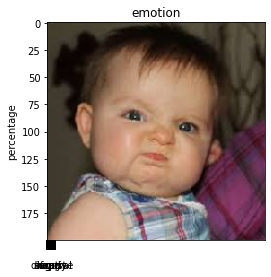

Expression Prediction: angry


In [ ]:

Emotion('/content/drive/My Drive/Ip/emotion/b7.jpg')

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.13857553311036488
Train accuracy: 95.24428844451904
Test loss: 2.407426950625305
Test accuracy: 59.01365280151367
